In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [3]:
url = 'https://raw.githubusercontent.com/TonyBMB/Python_course/refs/heads/main/Exercise%2034.csv'
df = pd.read_csv(url)
df.head()

,Gene Name,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,rpoC,32144000.0,27876000.0,16709000.0,25664000.0,27452000.0,21104000.0
1,gdhZ,30783000.0,27132000.0,16343000.0,19289000.0,21274000.0,17230000.0
2,rpoB,32908000.0,29162000.0,16587000.0,26168000.0,27069000.0,20876000.0
3,putA,41257000.0,36150000.0,24990000.0,24859000.0,27692000.0,23306000.0
4,gltB,4974600.0,4334200.0,3135400.0,2797400.0,2852700.0,2198300.0


In [4]:
numeric_columns = ['Control_1', 'Control_2', 'Control_3', 'KO_1', 'KO_2','KO_3']

In [11]:
# STEP 4: Apply log transformation to the numeric columns of the main DataFrame
# Using np.log which computes log(x)

# Create a copy to avoid modifying the original DataFrame directly if needed later
# Set 'Gene Name' as index so it's used for row labels in clustermap
temp_df = df.set_index('Gene Name')
log_transformed_df = temp_df[numeric_columns].copy()
log_transformed_df = np.log(log_transformed_df)

print("Original Numeric Data (first 5 rows):")
display(df[numeric_columns].head())

print("\nLog-Transformed Numeric Data with Gene Names as Index (first 5 rows):")
display(log_transformed_df.head())

Original Numeric Data (first 5 rows):


/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,32144000.0,27876000.0,16709000.0,25664000.0,27452000.0,21104000.0
1,30783000.0,27132000.0,16343000.0,19289000.0,21274000.0,17230000.0
2,32908000.0,29162000.0,16587000.0,26168000.0,27069000.0,20876000.0
3,41257000.0,36150000.0,24990000.0,24859000.0,27692000.0,23306000.0
4,4974600.0,4334200.0,3135400.0,2797400.0,2852700.0,2198300.0



Log-Transformed Numeric Data with Gene Names as Index (first 5 rows):


,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
Gene Name,,,,,,
rpoC,17.285736,17.143277,16.631458,17.060600,17.127950,16.864973
gdhZ,17.242473,17.116224,16.609310,16.775046,16.872996,16.662163
rpoB,17.309226,17.188377,16.624130,17.080048,17.113900,16.854111
putA,17.535331,17.403188,17.033986,17.028730,17.136654,16.964221
gltB,15.419856,15.282048,14.958267,14.844201,14.863776,14.603195


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


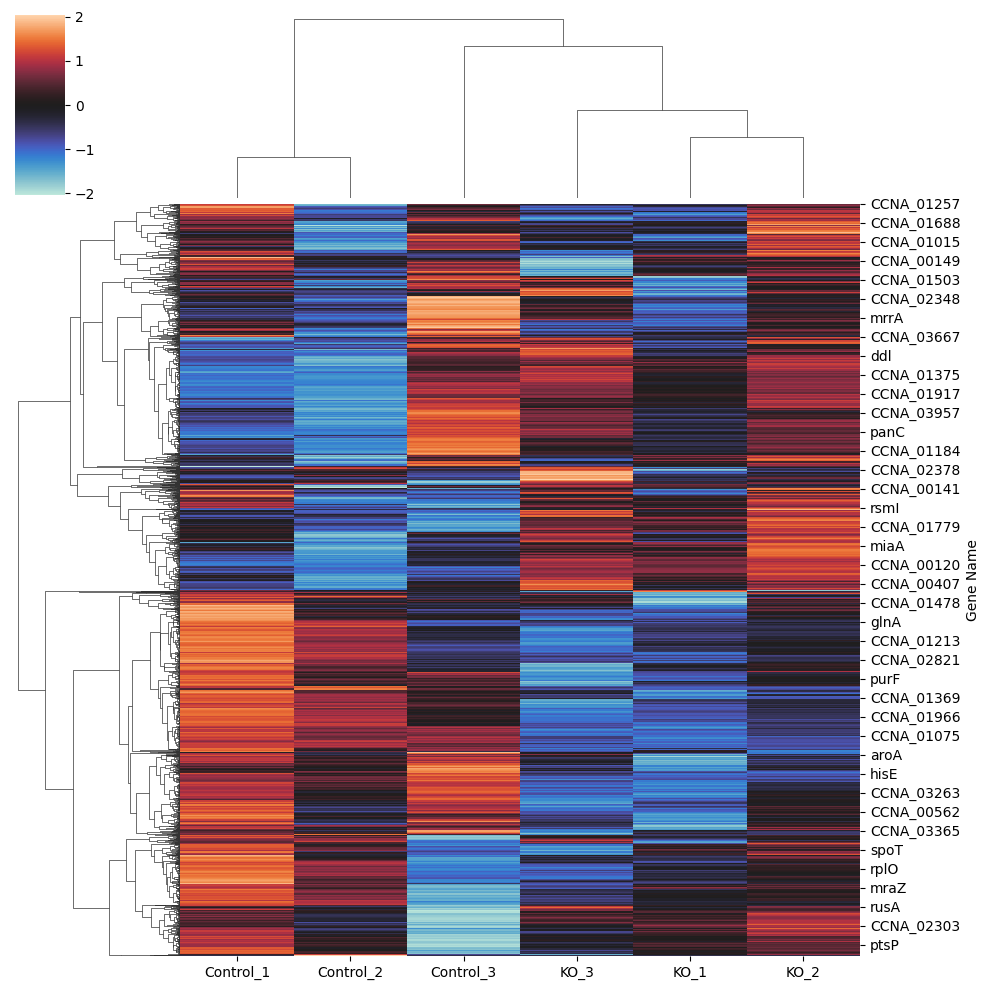

In [12]:
log_transformed_df_cleaned = log_transformed_df.replace([np.inf, -np.inf], np.nan)
log_transformed_df_cleaned = log_transformed_df_cleaned.fillna(0) # Replace NaN values (including those from -inf) with 0

# Identify and drop rows (genes) with zero variance (constant expression across samples)
row_variance_check = log_transformed_df_cleaned.var(axis=1)
rows_to_drop = row_variance_check[row_variance_check == 0].index.tolist()

if rows_to_drop:
    print(f"Warning: Dropping {len(rows_to_drop)} rows (genes) with zero variance (constant expression across samples).")
    log_transformed_df_processed = log_transformed_df_cleaned.drop(index=rows_to_drop)
else:
    log_transformed_df_processed = log_transformed_df_cleaned

# Identify and drop columns (samples) with zero variance (constant expression across genes)
col_variance_check = log_transformed_df_processed.var(axis=0)
columns_to_drop = col_variance_check[col_variance_check == 0].index.tolist()

if columns_to_drop:
    print(f"Warning: Dropping columns with zero variance: {columns_to_drop}")
    log_transformed_df_final = log_transformed_df_processed.drop(columns=columns_to_drop)
else:
    log_transformed_df_final = log_transformed_df_processed

# Check if the DataFrame is empty after dropping rows/columns
if log_transformed_df_final.empty:
    print("Error: DataFrame is empty after dropping constant rows/columns. Cannot perform clustermap.")
else:
    sns.clustermap(log_transformed_df_final, metric="correlation", z_score=0, method="average", cmap="icefire")
    plt.show()